In [16]:
import os
import sqlite3
import pandas as pd

In [17]:
# Pfade
INPUT_FOLDER = os.path.join("..", "input", "pm_bvg_raw")
OUTPUT_FOLDER = os.path.join("..", "output")
SQL_PATH = os.path.join(OUTPUT_FOLDER, "dwh.sqlite3")

In [18]:
# csv-Datei einlesen
df = pd.read_csv("../output/wordcount_news.csv")

In [19]:
df.head()

,count,word,source,date
0,142,sz,sz,2025-02-08
1,121,plus,sz,2025-02-08
2,26,anzeigen,sz,2025-02-08
3,10,magazin,sz,2025-02-08
4,9,artikel,sz,2025-02-08


In [20]:
print(df["source"].unique())         

['sz' 'zeit' 'faz' 'heise' 'golem' 'tagesspiegel' 'taz' 'abendblatt'
 'berliner' 'welt' 'medium' 'esslinger' 'kdnuggets' 'handelsblatt' 'ntv'
 'pioneer' 'suedwest' 't3n' 'economist' 'srf' 'wef' 'stuttgarter'
 'atlantic' 'netzpolitik' 'towardsds' 'uebermedien' 'vulture' 'boerse'
 'buchreport' '54books' 'dlf' 'dw-de' 'spiegel' 'cnn' 'bbc' 'dhv' 'mm'
 'stern' 'tagesschau' 'zvw' 'ieee' 'anwaltsverein' 'wiwo' 'dw-en' 'dav'
 'zwanzig' 'blick' 'nzz' 'republik' 'ta' 'watson-ch' 'nau' 'standard'
 'kronen' 'kurier' 'kleine' 'watson-de' 'vice-de']


In [21]:
# Ausgewählte Medien
SELECTED_MEDIA = [
    # Große Medien
    "sz", "zeit", "faz", "tagesspiegel", "taz", "berliner", "welt", "spiegel", "stern",
    # Regionale Medien
    "abendblatt", "esslinger", "suedwest", "stuttgarter", "zvw",
    # Öffentlich-rechtliche
    "dlf", "dw-de", "tagesschau",
    # Wirtschaft
    "handelsblatt", "wiwo", "mm", "pioneer", "boerse"
]

In [22]:
# Df filtern
df_selected = df[df["source"].isin(SELECTED_MEDIA)].copy()

In [23]:
# Check 
print(df_selected["source"].unique())           

['sz' 'zeit' 'faz' 'tagesspiegel' 'taz' 'abendblatt' 'berliner' 'welt'
 'esslinger' 'handelsblatt' 'pioneer' 'suedwest' 'stuttgarter' 'boerse'
 'dlf' 'dw-de' 'spiegel' 'mm' 'stern' 'tagesschau' 'zvw' 'wiwo']


In [24]:
# als CSV speichern
df_selected.to_csv("../output/wordcount_news_selected.csv", index=False)

In [25]:
# als SQL speichern
conn = sqlite3.connect(SQL_PATH)
df_selected.to_sql("wordcount_news_selected", conn, index=False, if_exists="replace")
conn.close()

In [26]:
#### Ab hier Analyse aber als Versuch
# csv-Datei einlesen
df = pd.read_csv("../output/wordcount_news_selected.csv")

In [ ]:
# Filter mentions bvg
df_bvg = df_selected[df_selected["word"].str.lower() == "bvg"]

In [40]:
# Mentions BVG pro Source
df_bvg.groupby("source")["count"].sum().sort_values(ascending=False)

source
berliner    4
taz         4
Name: count, dtype: int64

In [45]:
# Filter mentions BVG
df_bvg = df_selected[df_selected["word"].str.upper() == "BVG"]

In [46]:
# Mentions BVG pro Source
df_bvg.groupby("source")["count"].sum().sort_values(ascending=False)

source
berliner    4
taz         4
Name: count, dtype: int64

<Axes: title={'center': 'BVG-Erwähnungen pro Tag'}, xlabel='date'>

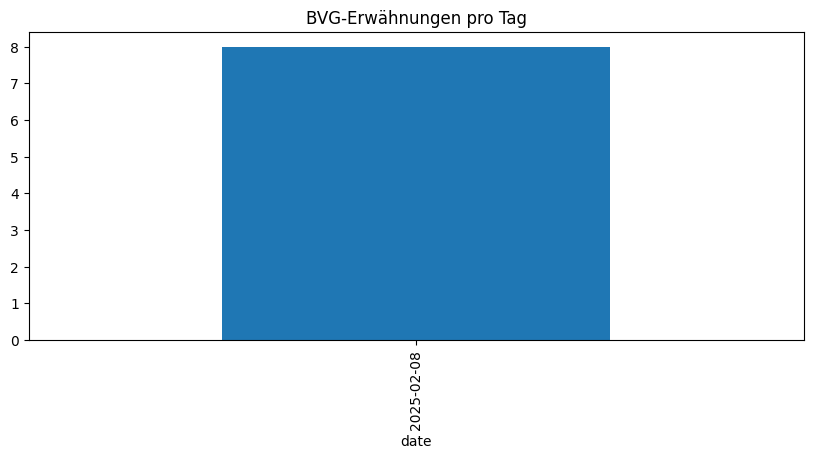

In [32]:
# Mentions BVG pro Tag
df_bvg.groupby("date")["count"].sum().plot(kind="bar", figsize=(10,4), title="BVG-Erwähnungen pro Tag")

In [49]:
df_bvg = df_selected[df_selected["word"].str.lower().str.contains("bvg", na=False)]

In [50]:
df_bvg.groupby("source")["count"].sum().sort_values(ascending=False)

source
berliner        12
taz              8
tagesspiegel     4
Name: count, dtype: int64

In [51]:
df_bvg["word"].value_counts().head(10)

word
bvg            8
bvg-takte      4
bvg-angebot    4
bvg-streik     4
bvg:           4
Name: count, dtype: int64

In [52]:
df_selected[df_selected["word"].str.lower().str.contains("bvg", na=False)]["word"].unique()

array(['bvg-takte', 'bvg-angebot', 'bvg', 'bvg-streik', 'bvg:'],
      dtype=object)

In [53]:
df_selected["source"].value_counts()

source
boerse          10092
welt             8600
faz              8260
zeit             8128
stuttgarter      8088
spiegel          8008
tagesspiegel     7032
stern            6952
sz               6676
dlf              6460
esslinger        5816
berliner         5548
abendblatt       5204
mm               5188
taz              4832
suedwest         4156
tagesschau       3032
zvw              2140
dw-de            2024
pioneer           612
handelsblatt       36
wiwo               36
Name: count, dtype: int64

In [54]:
df_selected["date"].min(), df_selected["date"].max()

('2025-02-08', '2025-02-08')